In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Part 1: Multiply X by 1000

In [2]:
def make_regressor(x,noise=False,mean=0,var=0.5):
    if not noise: return x
    return x+np.random.normal(mean,var,x.shape[0])

In [3]:
x = np.linspace(-1,10,50)*1000
y = make_regressor(x,noise=True,var=0.25)
x = (x-x.mean())/np.std(x)
y = (y-y.mean())/np.std(y)
weight,bias=10,0
lr=0.01
losser,mse=[],[]
for _ in range(10000):
    preds = x*weight+bias
    loss = preds-y
    loss_std = loss/len(x)
    mse.append(((preds-y)**2).mean())
    losser.append(loss_std)
    weight = weight - lr*np.dot(x.T,loss_std)
    bias = bias - lr*np.mean(loss_std)

In [4]:
"""
Multiplying x with 1000 and then running the algorithm will give an error. This error occurs not only 
by multiplying by 1000 but also by 10 and 100.
According to me, this error occurs because the training data points are too far from each other, 
in other words the difference between corresponding values. When the loss values are multiplied with 
these values and sumed we get large values which when put in the equation give astronomical 
weights and bias. Hence the loss rises.

So, we standardise these values and the code works like charm.
"""

'\nMultiplying x with 1000 and then running the algorithm will give an error. This error occurs not only \nby multiplying by 1000 but also by 10 and 100.\nAccording to me, this error occurs because the training data points are too far from each other, \nin other words the difference between corresponding values. When the loss values are multiplied with \nthese values and sumed we get large values which when put in the equation give astronomical \nweights and bias. Hence the loss rises.\n\nSo, we standardise these values and the code works like charm.\n'

C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


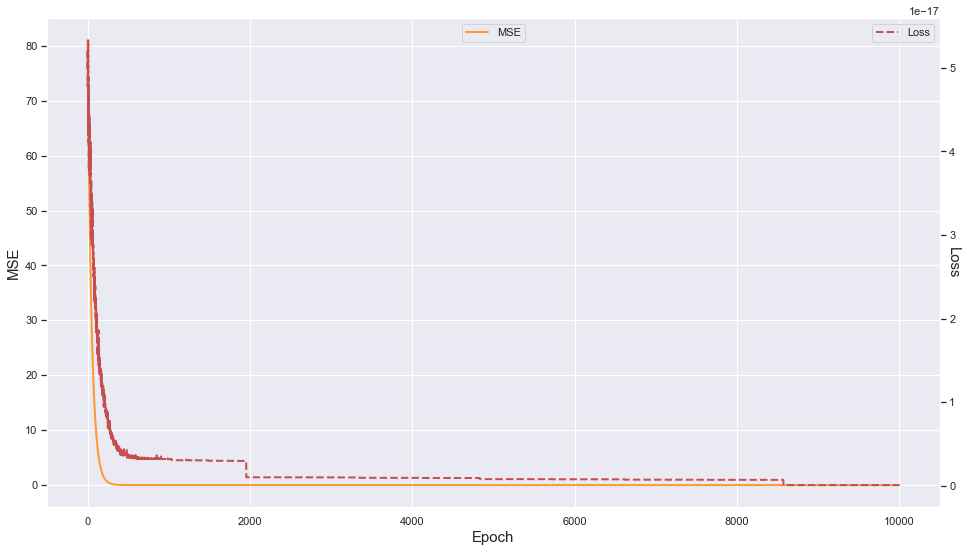

In [5]:
plt.figure(figsize=(16,9))
ax = sns.lineplot(np.arange(10000),mse,color="#ff9933",linewidth=2)
ax2 = plt.twinx()
sns.lineplot(np.arange(10000),np.array(losser).mean(axis=1), color="r",linewidth=2,
             ax=ax2,linestyle="dashed")
ax2.grid(False)
ax.set_ylabel("MSE",fontsize=15)
ax2.set_ylabel("Loss",fontsize=15,rotation=270)
ax.set_xlabel("Epoch",fontsize=15)
ax.legend(["MSE"],loc="upper center")
ax2.legend(["Loss"],loc="upper right")
plt.show()

C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


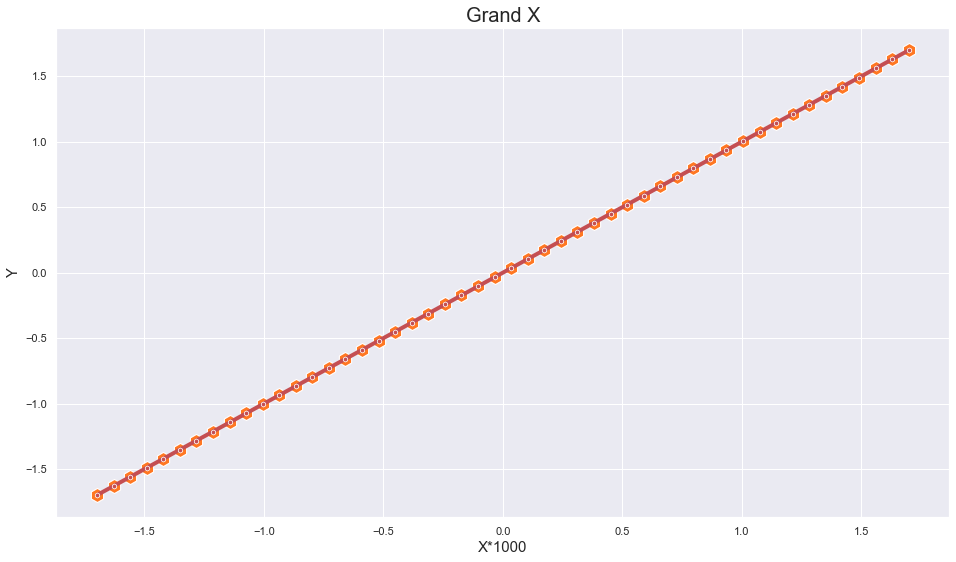

In [6]:
plt.figure(figsize=(16,9))
sns.scatterplot(x,y,s=200,marker="h",color="#FF7722")
sns.lineplot(x,x,marker="h",color="r",linewidth=4,markersize=5)
plt.xlabel("X*1000",fontsize=15)
plt.ylabel("Y",fontsize=15)
plt.title("Grand X",fontsize=20)
plt.show()

## Part 2: Scratch Code Linear Regression

In [7]:
data = pd.read_csv("Real estate.csv",usecols=["X1 transaction date","X2 house age",
                                              "X3 distance to the nearest MRT station",
                                              "X4 number of convenience stores",
                                              "X5 latitude","X6 longitude",
                                              "Y house price of unit area"])

In [8]:
data = np.array(data)

In [9]:
test_size = 0.2

In [10]:
x_train,y_train = data[:int(len(data)*(1-test_size)),:-1], data[:int(len(data)*(1-test_size)),-1]
x_test,y_test = data[int(len(data)*(1-test_size)):,:-1], data[int(len(data)*(1-test_size)):,-1]

In [11]:
y_train = np.reshape(y_train,(y_train.shape[0],1))
y_test = np.reshape(y_test,(y_test.shape[0],1))

### Standardisation

In [12]:
for i in range(x_train.shape[1]):
    x_train[:,i] = (x_train[:,i]-x_train[:,i].mean())/np.std(x_train[:,i])
    x_test[:,i] = (x_test[:,i]-x_test[:,i].mean())/np.std(x_test[:,i])

### Adjusting Weights and Bias with Gradient Decent

In [13]:
class LinearRegression:
    def __init__(self,learning_rate=0.01,init_val=0.1):
        self.learning_rate = learning_rate
        self.init_val = init_val
        self.mse_curve = []
    def fit(self,x_train,y_train,iterer=10000):
        weights = np.random.uniform(-self.init_val,self.init_val,size=(x_train.shape[1],1))
        bias = np.random.uniform(-self.init_val,self.init_val,size=1)
        for _ in range(iterer):
            preds = np.dot(x_train,weights)+bias
            loss = preds-y_train
            self.mse_curve.append(((preds-y_train)**2).mean())
            loss_std = loss/len(x_train)
            weights = weights - self.learning_rate*np.dot(x_train.T,loss_std)
            bias = bias - self.learning_rate*np.sum(loss_std)
        self.coef_ = weights
        self.intercept_ = bias
    def predict(self,x_test):
        self.preds = np.dot(x_test,self.coef_)+self.intercept_
        return self.preds
    def evaluate(self,x,y):
        self.ssr = np.sum((self.predict(x)-y.mean())**2)
        self.sst = np.sum((y-y.mean())**2)
        self.r_sq = (self.ssr/self.sst)
        self.r_sq_adj = 1-(((1-self.r_sq)*(x.shape[0]-1))/(x.shape[0]-x.shape[1]-1))
        self.rmse = np.sqrt(np.sum(((self.predict(x)-y)**2).mean()))
        return {"SSR":self.ssr,"SST":self.sst,"R-Squared":self.r_sq,
                "Adj. R-Squared":self.r_sq_adj,"RMSE":self.rmse}

In [14]:
reg = LinearRegression(0.01,0.1)

In [15]:
reg.fit(x_train,y_train)

In [16]:
reg.coef_, reg.intercept_

(array([[ 1.4339579 ],
        [-3.2216376 ],
        [-5.24080757],
        [ 3.43446949],
        [ 3.12296564],
        [-0.11837742]]),
 array([37.89607251]))

In [17]:
preds=reg.predict(x_test)

In [18]:
reg.evaluate(x_test,y_test)

{'SSR': 8136.672423585537,
 'SST': 12628.529638554215,
 'R-Squared': 0.6443087720002428,
 'Adj. R-Squared': 0.6162278855792094,
 'RMSE': 7.711623132414497}

### MSE vs Epoch Curve

C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


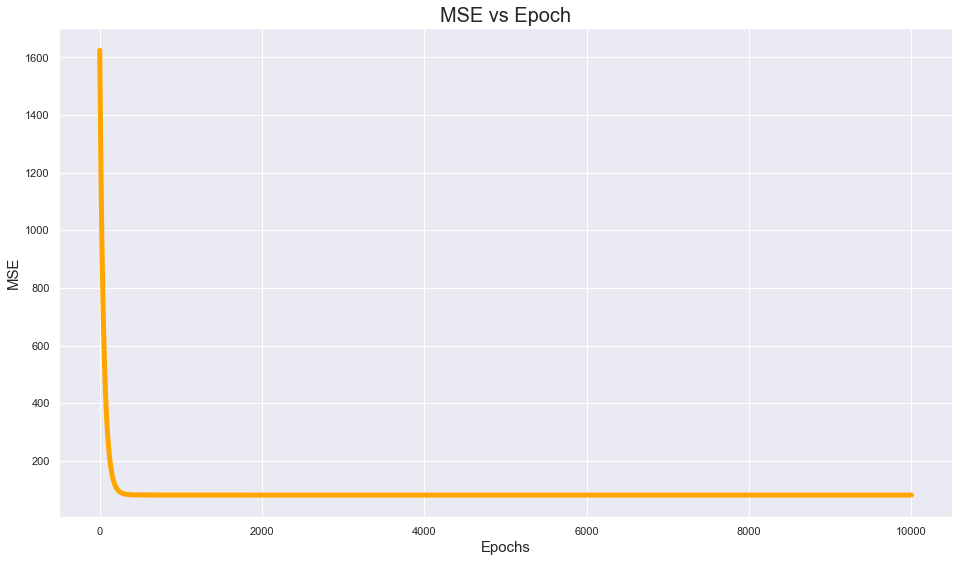

In [19]:
plt.figure(figsize=(16,9))
sns.lineplot(np.arange(10000),reg.mse_curve, color = "#FFA500",linewidth=5)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", fontsize=15)
plt.title("MSE vs Epoch", fontsize=20)
plt.show()